In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [108]:
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import PIL.Image
import sys

In [109]:
import pathlib
path= '/kaggle/input/animals10/raw-img'
data_dir= pathlib.Path(path)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1919


In [110]:
cane = list(data_dir.glob('cane/*'))
First_image= PIL.Image.open(str(cane[0]))
print("image size",First_image.width,"x",First_image.height)

image size 300 x 254


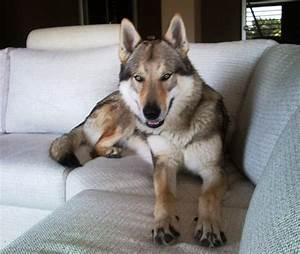

In [111]:
PIL.Image.open(cane[0])

In [112]:
batch_size=64
img_height = 200
img_width = 200

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


In [113]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [114]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca" , "squirrel": "scoiattolo","ragno": "spider"}

In [115]:
print(translate.get("spider"))

None


In [116]:
class_names = train_ds.class_names
print(class_names)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


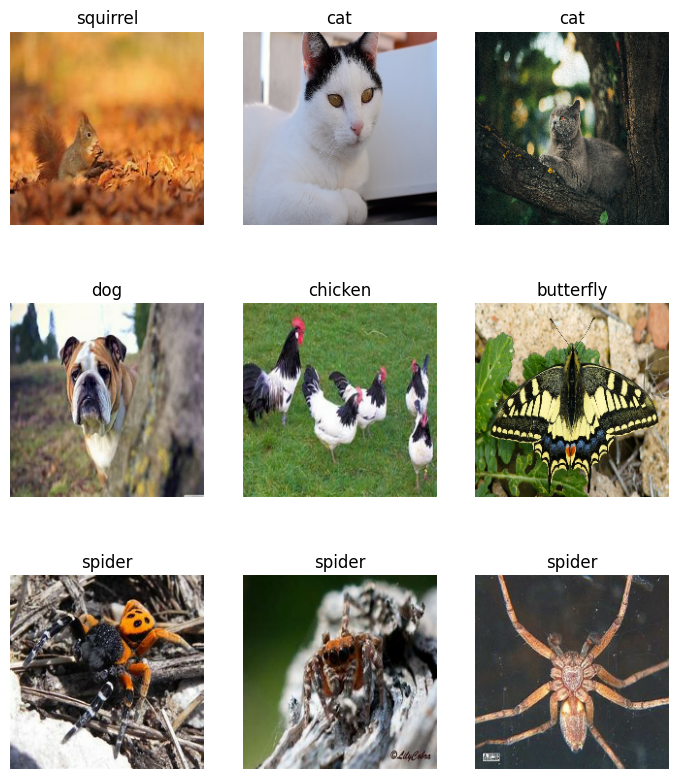

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8.5,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(translate.get(class_names[labels[i]]))
#     print(class_names[labels[i]])
    plt.axis("off")

In [129]:
# normalization
Normalization_layer= tf.keras.layers.Rescaling(1./255)
Normalized_train_ds= train_ds.map(lambda x,y:(Normalization_layer(x),y))
images, labels= next(iter(Normalized_train_ds.take(1)))
first_image= images[0]
print(np.min(first_image),np.max(first_image))

0.0 0.99932605


In [130]:
# caching for higher speed
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [135]:
#transfer learning
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet',include_top=False)



Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno -3] Temporary failure in name resolution